[Week1 - exercise 6](https://github.com/toelt-llc/COURSE-zhaw-dlcourse-spring2019/blob/master/Week%201%20-%20Mathematic%20introduction/Week%201%20-%20Linear%20Algebra%20and%20Python%20Introduction.ipynb)

In [193]:

from google.colab import drive
import pandas as pd
import random
import math
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
drive.mount('/content/drive/', force_remount=True)
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('/content/drive/My Drive/COURSE-zhaw-dlcourse-spring2019/housing.csv', header=None, delimiter=r"\s+", names=column_names)

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow import keras
(train_data, train_targets), (test_data, test_targets) = keras.datasets.boston_housing.load_data()

Mounted at /content/drive/


Instructions for updating:
non-resource variables are not supported in the long term


57026/57026 [==============================] - 0s 0us/step


In [ ]:
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [ ]:
# Dimension of the dataset
print(np.shape(data))

(506, 14)


In [ ]:
Y = data["B"]

In [ ]:
Y.head()


,0
0,1.00000
1,0.11747
2,18.00000
3,2.31000
4,0.00000


In [ ]:
X = data.drop("B", axis = 1)

In [ ]:
X["b"] = 1

In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,b
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33,36.2,1


In [ ]:
cols = X.columns.tolist()
cols = cols[-1:] + cols[:-1]
print(cols)

['b', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']


In [ ]:
X = X[cols]

In [ ]:
X.head()

,b,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14,21.6
2,1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03,34.7
3,1,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33.4
4,1,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33,36.2


In [ ]:
part1 = np.linalg.inv(np.matmul(X.transpose() , X))
part2 = np.matmul(X.transpose(), Y)

p = np.matmul(part1, part2)

<ipython-input-16-6b70ba332bb5>:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  part1 = np.linalg.inv(np.matmul(X.transpose() , X))


In [ ]:
print(p)

[ 4.47329548e+02 -1.12575462e+00 -6.19511211e-02 -7.95997605e-01
  9.18610333e+00 -5.84334321e+01 -2.56641439e+01  3.04175528e-01
  2.18662724e+00 -2.52865090e+00 -4.83020059e-03  4.03476031e+00
 -1.51395515e+00  2.56083094e+00]


In [ ]:
X2 = [1,  0.11747, 18.0	, 2.31	, 0	, 0.538	, 6.575, 	65.2, 	4.0900, 	1	, 296.0	, 15.3,  4.98	, 24.0]

In [ ]:
Yhat = np.matmul(X2, p)
print(Yhat)

384.53393712948304


In [ ]:

Y = data["CRIM"]
X = data["B"]

print(X.shape)
print(Y.shape)

(506,)
(506,)


In [ ]:
coeff = data['CRIM'].corr(data['B'])
if coeff < 0 :
  print("negative Korrelation")
print(coeff)

if abs(coeff) >= 0.5:
  print("starker Zusammenhang")
if (abs(coeff) >= 0.3) and (abs(coeff) < 0.5):
  print("moderater Zusammenhang")
if (abs(coeff) < 0.3) and (abs(coeff) >= 0.1):
  print("schwacher Zusammenhang")

negative Korrelation
-0.3850639419942241
moderater Zusammenhang


Medium correlation between B and CRIM

Text(0, 0.5, 'B Predicted Target Value')

<Figure size 640x480 with 0 Axes>

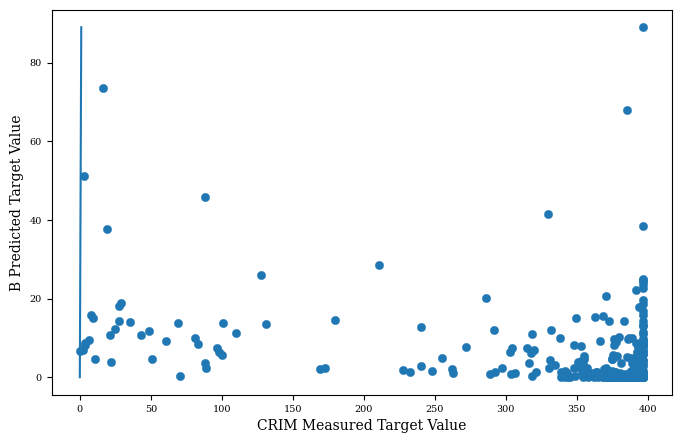

In [195]:
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

plt.tight_layout()

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X, Y, lw = 0.3)
ax.plot([Y.min(), Y.max()])

ax.set_xlabel('CRIM Measured Target Value')
ax.set_ylabel('B Predicted Target Value')

In [197]:
X = pd.DataFrame(train_data)
Y = pd.DataFrame(train_targets)

In [198]:
X['b'] = 1

In [201]:
cols = X.columns.tolist()
cols = cols[-1:] + cols[:-1]
print(cols)

[12, 'b', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [202]:
X = X[cols]

In [203]:
X.head()

,12,b,0,1,2,3,4,5,6,7,8,9,10,11
0,18.72,1,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90
1,3.11,1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38
2,3.26,1,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52
3,8.01,1,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90
4,14.65,1,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43


In [204]:
part1 = np.linalg.inv(np.matmul(X.transpose() , X))
part2 = np.matmul(X.transpose(), Y)

p = np.matmul(part1, part2)

<ipython-input-204-6b70ba332bb5>:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  part1 = np.linalg.inv(np.matmul(X.transpose() , X))
<ipython-input-204-6b70ba332bb5>:2: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to ke

In [205]:
print(p)

            0
0   -0.555843
1   40.293671
2   -0.119998
3    0.057000
4    0.003984
5    4.126982
6  -20.500296
7    3.380249
8    0.007568
9   -1.711898
10   0.334748
11  -0.011780
12  -0.902318
13   0.008719


In [206]:
Yhat = np.matmul(X, p)

<ipython-input-206-b1df42987377>:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  Yhat = np.matmul(X, p)


Text(0, 0.5, 'Predicted Target Value')

<Figure size 640x480 with 0 Axes>

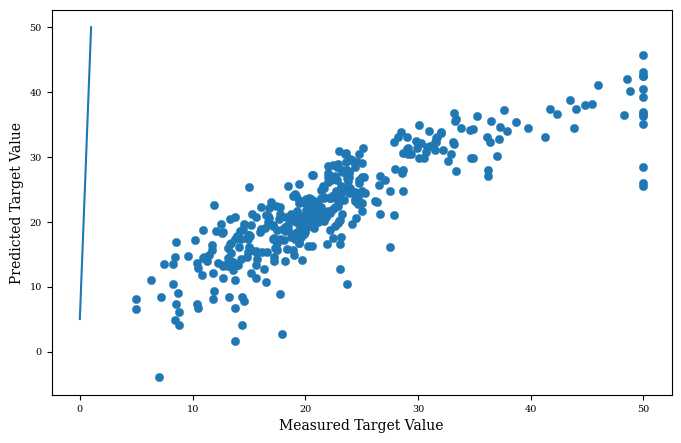

In [209]:
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

plt.tight_layout()

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(Y, Yhat, lw = 0.3)
ax.plot([Y.min(), Y.max()])# Exercise 7

# From the previous exercise you should get a plot similar to this one

# ![](boston_result.png)

# Answer why there is  set of vertical point at ```"Measured Target Value = 50".```], [Y.min(), Y.max()], 'k--', lw = 3)
ax.set_xlabel('Measured Target Value')
ax.set_ylabel('Predicted Target Value')